In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Carregar dados preparados
data = pd.read_csv('./data/prepared_data.csv')
data.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score,Salary_Range,Physical_Health_Shoulder_Pain,Physical_Health_Neck_Pain,Physical_Health_Back_Pain,Physical_Health_Eye_Strain,Physical_Health_Wrist_Pain
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,2,$40K-60K,1,0,0,0,0
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,2,$80K-100K,0,0,1,0,0
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,2,$80K-100K,1,0,0,0,0
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,2,$60K-80K,1,0,0,0,0
4,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,3,$60K-80K,0,0,1,0,0


In [37]:
data.drop(columns=['Survey_Date'], inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            2877 non-null   int64 
 1   Gender                         2877 non-null   object
 2   Region                         2877 non-null   object
 3   Industry                       2877 non-null   object
 4   Job_Role                       2877 non-null   object
 5   Work_Arrangement               2877 non-null   object
 6   Hours_Per_Week                 2877 non-null   int64 
 7   Mental_Health_Status           2877 non-null   object
 8   Burnout_Level                  2877 non-null   object
 9   Work_Life_Balance_Score        2877 non-null   int64 
 10  Social_Isolation_Score         2877 non-null   int64 
 11  Salary_Range                   2877 non-null   object
 12  Physical_Health_Shoulder_Pain  2877 non-null   int64 
 13  Phy

In [39]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Selecionar colunas categóricas
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse_output=False, drop='if_binary') # Não dropei aqui, porque quero manter todas as categorias
encoded = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=data.index)

# Concatenar com colunas numéricas
data_kmeans = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

# Normalizar todas as variáveis para o KMeans
scaler = MinMaxScaler()
data_kmeans = pd.DataFrame(scaler.fit_transform(data_kmeans), columns=data_kmeans.columns, index=data_kmeans.index)
data_kmeans.head()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Physical_Health_Shoulder_Pain,Physical_Health_Neck_Pain,Physical_Health_Back_Pain,Physical_Health_Eye_Strain,Physical_Health_Wrist_Pain,Gender_Female,...,Mental_Health_Status_Stress Disorder,Mental_Health_Status_unknown,Burnout_Level_High,Burnout_Level_Low,Burnout_Level_Medium,Salary_Range_$100K-120K,Salary_Range_$120K+,Salary_Range_$40K-60K,Salary_Range_$60K-80K,Salary_Range_$80K-100K
0,0.116279,0.966667,0.50,0.25,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.348837,0.066667,0.75,0.25,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.232558,0.033333,0.50,0.25,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.418605,0.933333,0.00,0.25,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.697674,0.866667,0.75,0.50,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
data_kmeans.columns

Index(['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
       'Social_Isolation_Score', 'Physical_Health_Shoulder_Pain',
       'Physical_Health_Neck_Pain', 'Physical_Health_Back_Pain',
       'Physical_Health_Eye_Strain', 'Physical_Health_Wrist_Pain',
       'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Region_Africa', 'Region_Asia',
       'Region_Europe', 'Region_North America', 'Region_Oceania',
       'Region_South America', 'Industry_Customer Service',
       'Industry_Education', 'Industry_Finance', 'Industry_Healthcare',
       'Industry_Manufacturing', 'Industry_Marketing',
       'Industry_Professional Services', 'Industry_Retail',
       'Industry_Technology', 'Job_Role_Account Manager',
       'Job_Role_Business Analyst', 'Job_Role_Consultant',
       'Job_Role_Content Writer', 'Job_Role_Customer Service Manager',
       'Job_Role_Data Analyst', 'Job_Role_Data Scientist',
       'Job_Role_DevOps Engineer', 'Job_Role_Digital Mar

In [41]:
# Classificação de cluster

from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=4)

modelo.fit(data_kmeans)

print('Grupos {}'.format(modelo.labels_))

Grupos [0 0 0 ... 0 2 0]


/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/75467/Desktop/Doutorado/AAED/Trabalho_Final/MentalHealthAnalysis/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: 

In [42]:
print(data.columns)
print(modelo.cluster_centers_)

Index(['Age', 'Gender', 'Region', 'Industry', 'Job_Role', 'Work_Arrangement',
       'Hours_Per_Week', 'Mental_Health_Status', 'Burnout_Level',
       'Work_Life_Balance_Score', 'Social_Isolation_Score', 'Salary_Range',
       'Physical_Health_Shoulder_Pain', 'Physical_Health_Neck_Pain',
       'Physical_Health_Back_Pain', 'Physical_Health_Eye_Strain',
       'Physical_Health_Wrist_Pain'],
      dtype='object')
[[ 5.18276647e-01  5.09572215e-01  5.18742058e-01  3.61817027e-01
   2.68106734e-01  3.04955527e-02  5.52731893e-01  1.29606099e-01
   1.90597205e-02  9.37738247e-01 -6.10622664e-16  4.82846252e-02
   1.39771283e-02  1.76620076e-01  1.58831004e-01  1.38500635e-01
   1.94409149e-01  1.47395172e-01  1.84243964e-01  5.46378653e-02
   9.65692503e-02  1.34688691e-01  9.02160102e-02  8.76747141e-02
   7.36975858e-02  2.88437103e-01  7.75095299e-02  9.65692503e-02
   4.19313850e-02  3.43074968e-02  3.93900889e-02  3.30368488e-02
   4.06607370e-02  4.06607370e-02  3.81194409e-02  4.9555

In [43]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=data_kmeans.columns)
grupos = grupos.T

In [44]:
grupos

,0,1,2,3
Age,0.518277,0.510615,0.491365,0.500876
Hours_Per_Week,0.509572,0.496315,0.492409,0.483333
Work_Life_Balance_Score,0.518742,0.488275,0.486249,0.501712
Social_Isolation_Score,0.361817,0.474874,0.402365,0.511986
Physical_Health_Shoulder_Pain,0.268107,0.257956,0.245325,0.275685
...,...,...,...,...
Salary_Range_$100K-120K,0.153748,0.117253,0.161716,0.131849
Salary_Range_$120K+,0.052097,0.072027,0.063806,0.071918
Salary_Range_$40K-60K,0.144854,0.172529,0.155116,0.195205
Salary_Range_$60K-80K,0.340534,0.316583,0.315732,0.294521


In [45]:
data_kmeans.columns

Index(['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
       'Social_Isolation_Score', 'Physical_Health_Shoulder_Pain',
       'Physical_Health_Neck_Pain', 'Physical_Health_Back_Pain',
       'Physical_Health_Eye_Strain', 'Physical_Health_Wrist_Pain',
       'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Region_Africa', 'Region_Asia',
       'Region_Europe', 'Region_North America', 'Region_Oceania',
       'Region_South America', 'Industry_Customer Service',
       'Industry_Education', 'Industry_Finance', 'Industry_Healthcare',
       'Industry_Manufacturing', 'Industry_Marketing',
       'Industry_Professional Services', 'Industry_Retail',
       'Industry_Technology', 'Job_Role_Account Manager',
       'Job_Role_Business Analyst', 'Job_Role_Consultant',
       'Job_Role_Content Writer', 'Job_Role_Customer Service Manager',
       'Job_Role_Data Analyst', 'Job_Role_Data Scientist',
       'Job_Role_DevOps Engineer', 'Job_Role_Digital Mar

In [46]:
data_kmeans.Work_Arrangement_Hybrid.value_counts()

Work_Arrangement_Hybrid
0.0    1961
1.0     916
Name: count, dtype: int64

In [52]:
grupo_bem_estar = [
    'Age', 'Hours_Per_Week', 'Work_Life_Balance_Score', 'Social_Isolation_Score',
    'Physical_Health_Shoulder_Pain', 'Physical_Health_Neck_Pain',
    'Physical_Health_Back_Pain', 'Physical_Health_Eye_Strain', 'Physical_Health_Wrist_Pain'
]

grupo_demografia = [
    'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Gender_Prefer not to say',
    'Region_Africa', 'Region_Asia', 'Region_Europe', 'Region_North America',
    'Region_Oceania', 'Region_South America'
]

grupo_industria = [
    'Industry_Customer Service', 'Industry_Education', 'Industry_Finance',
    'Industry_Healthcare', 'Industry_Manufacturing', 'Industry_Marketing',
    'Industry_Professional Services', 'Industry_Retail', 'Industry_Technology'
]

grupo_funcoes = [
    'Job_Role_Account Manager', 'Job_Role_Business Analyst', 'Job_Role_Consultant',
    'Job_Role_Content Writer', 'Job_Role_Customer Service Manager',
    'Job_Role_Data Analyst', 'Job_Role_Data Scientist', 'Job_Role_DevOps Engineer',
    'Job_Role_Digital Marketing Specialist', 'Job_Role_Executive Assistant',
    'Job_Role_Financial Analyst', 'Job_Role_HR Manager', 'Job_Role_IT Support',
    'Job_Role_Marketing Specialist', 'Job_Role_Operations Manager',
    'Job_Role_Product Manager', 'Job_Role_Project Manager', 'Job_Role_Quality Assurance',
    'Job_Role_Research Scientist', 'Job_Role_Sales Representative',
    'Job_Role_Social Media Manager', 'Job_Role_Software Engineer',
    'Job_Role_Technical Writer', 'Job_Role_UX Designer'
]

grupo_arranjo = [
    'Work_Arrangement_Hybrid', 'Work_Arrangement_Onsite', 'Work_Arrangement_Remote'
]

grupo_saude_mental = [
    'Mental_Health_Status_ADHD', 'Mental_Health_Status_Anxiety',
    'Mental_Health_Status_Burnout', 'Mental_Health_Status_Depression',
    'Mental_Health_Status_PTSD', 'Mental_Health_Status_Stress Disorder',
    'Mental_Health_Status_unknown', 'Burnout_Level_High',
    'Burnout_Level_Low', 'Burnout_Level_Medium'
]

grupo_salario = [
    'Salary_Range_$40K-60K', 'Salary_Range_$60K-80K',
    'Salary_Range_$80K-100K', 'Salary_Range_$100K-120K', 'Salary_Range_$120K+'
]



In [53]:
grupos.index

Index(['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
       'Social_Isolation_Score', 'Physical_Health_Shoulder_Pain',
       'Physical_Health_Neck_Pain', 'Physical_Health_Back_Pain',
       'Physical_Health_Eye_Strain', 'Physical_Health_Wrist_Pain',
       'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Region_Africa', 'Region_Asia',
       'Region_Europe', 'Region_North America', 'Region_Oceania',
       'Region_South America', 'Industry_Customer Service',
       'Industry_Education', 'Industry_Finance', 'Industry_Healthcare',
       'Industry_Manufacturing', 'Industry_Marketing',
       'Industry_Professional Services', 'Industry_Retail',
       'Industry_Technology', 'Job_Role_Account Manager',
       'Job_Role_Business Analyst', 'Job_Role_Consultant',
       'Job_Role_Content Writer', 'Job_Role_Customer Service Manager',
       'Job_Role_Data Analyst', 'Job_Role_Data Scientist',
       'Job_Role_DevOps Engineer', 'Job_Role_Digital Mar

In [54]:
grupo_bem_estar

['Age',
 'Hours_Per_Week',
 'Work_Life_Balance_Score',
 'Social_Isolation_Score',
 'Physical_Health_Shoulder_Pain',
 'Physical_Health_Neck_Pain',
 'Physical_Health_Back_Pain',
 'Physical_Health_Eye_Strain',
 'Physical_Health_Wrist_Pain']

In [55]:
grupos.columns

RangeIndex(start=0, stop=4, step=1)

<Figure size 1600x500 with 0 Axes>

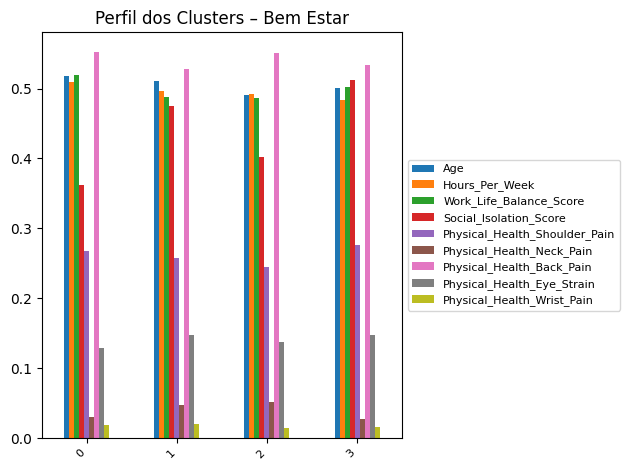

<Figure size 1600x500 with 0 Axes>

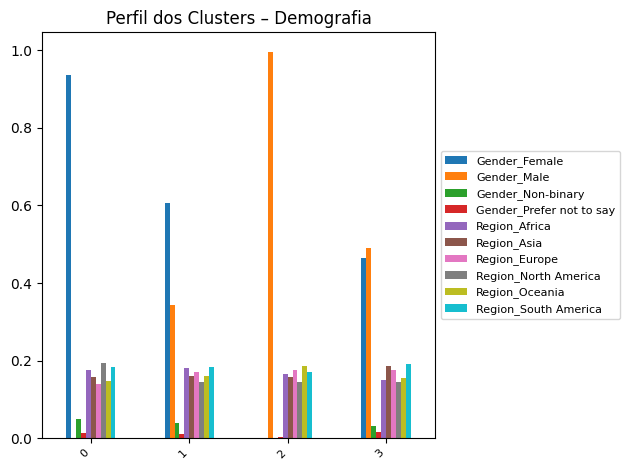

<Figure size 1600x500 with 0 Axes>

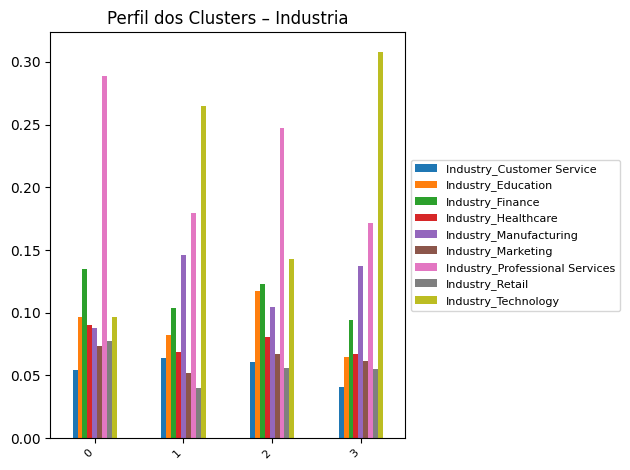

<Figure size 1600x500 with 0 Axes>

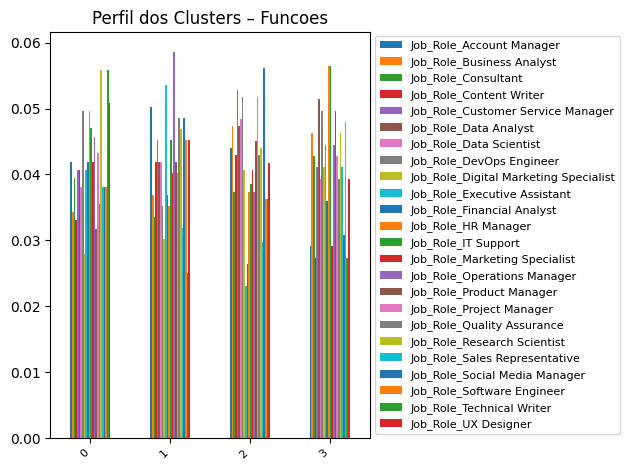

<Figure size 1600x500 with 0 Axes>

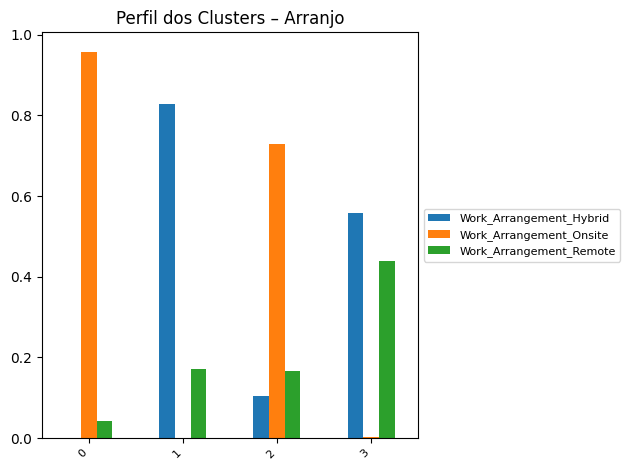

<Figure size 1600x500 with 0 Axes>

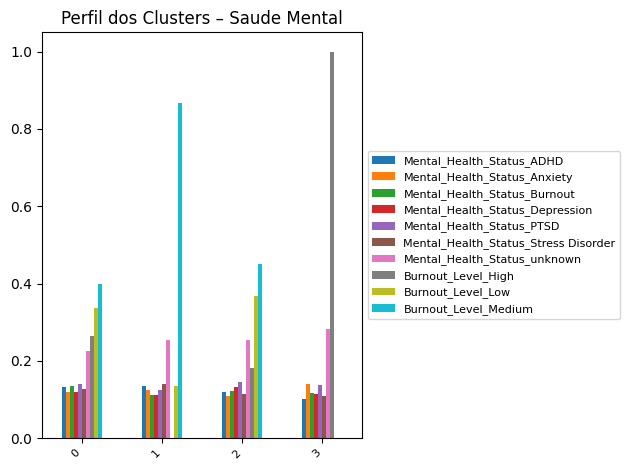

<Figure size 1600x500 with 0 Axes>

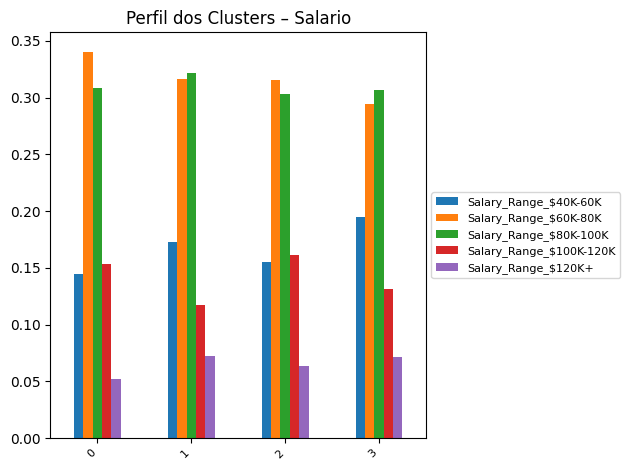

In [ ]:
for grupo, nome in zip([grupo_bem_estar, grupo_demografia, grupo_industria, grupo_funcoes,
                       grupo_arranjo, grupo_saude_mental, grupo_salario],
                       ['Bem Estar', 'Demografia', 'Industria', 'Funcoes', 'Arranjo',
                        'Saude Mental', 'Salario']):
    plt.figure(figsize=(16, 5))  # Largura aumentada
    grupos.loc[grupo].T.plot.bar(r)
    plt.title(f'Perfil dos Clusters – {nome}')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
    plt.tight_layout()
    plt.show()
